In [29]:
!pip install torch matplotlib seaborn

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
def scaled_dot_product_attention(Q, K, V, return_weights=True):
    """
    Compute scaled dot-product attention
    Q, K, V: tensors of shape (seq_len, d_k)
    return_weights: if True, also return attention weight matrix
    """
    d_k = Q.size(-1)

    # Step 1: Compute raw scores
    scores = torch.matmul(Q, K.transpose(-2, -1))
    print("Raw scores (before scaling):\n", scores)

    # Step 2: Scale by sqrt(d_k) for numerical stability
    scaled_scores = scores / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    print("\nScaled scores (after dividing by sqrt(d_k)):\n", scaled_scores)

    # Step 3: Softmax to get attention weights
    attn_weights = F.softmax(scaled_scores, dim=-1)
    print("\nAttention weights (softmax):\n", attn_weights)

    # Step 4: Multiply weights by V to get final output
    output = torch.matmul(attn_weights, V)

    if return_weights:
        return output, attn_weights
    return output


In [31]:
# Random Q, K, V
seq_len = 4
d_k = 8

torch.manual_seed(42)  # reproducibility
Q = torch.randn(seq_len, d_k)
K = torch.randn(seq_len, d_k)
V = torch.randn(seq_len, d_k)

print("Q:\n", Q)
print("\nK:\n", K)
print("\nV:\n", V)

# Compute attention
output, attn_weights = scaled_dot_product_attention(Q, K, V)

print("\nOutput vectors:\n", output)


Q:
 tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784, -1.2345, -0.0431, -1.6047],
        [-0.7521,  1.6487, -0.3925, -1.4036, -0.7279, -0.5594, -0.7688,  0.7624],
        [ 1.6423, -0.1596, -0.4974,  0.4396, -0.7581,  1.0783,  0.8008,  1.6806],
        [ 1.2791,  1.2964,  0.6105,  1.3347, -0.2316,  0.0418, -0.2516,  0.8599]])

K:
 tensor([[-1.3847, -0.8712, -0.2234,  1.7174,  0.3189, -0.4245,  0.3057, -0.7746],
        [-1.5576,  0.9956, -0.8798, -0.6011, -1.2742,  2.1228, -1.2347, -0.4879],
        [-0.9138, -0.6581,  0.0780,  0.5258, -0.4880,  1.1914, -0.8140, -0.7360],
        [-1.4032,  0.0360, -0.0635,  0.6756, -0.0978,  1.8446, -1.1845,  1.3835]])

V:
 tensor([[ 1.4451,  0.8564,  2.2181,  0.5232,  0.3466, -0.1973, -1.0546,  1.2780],
        [-0.1722,  0.5238,  0.0566,  0.4263,  0.5750, -0.6417, -2.2064, -0.7508],
        [ 0.0109, -0.3387, -1.3407, -0.5854,  0.5362,  0.5246,  1.1412,  0.0516],
        [ 0.7440, -0.4816, -1.0495,  0.6039, -1.7223, -0.8278,  1.3347,  0.4835]])

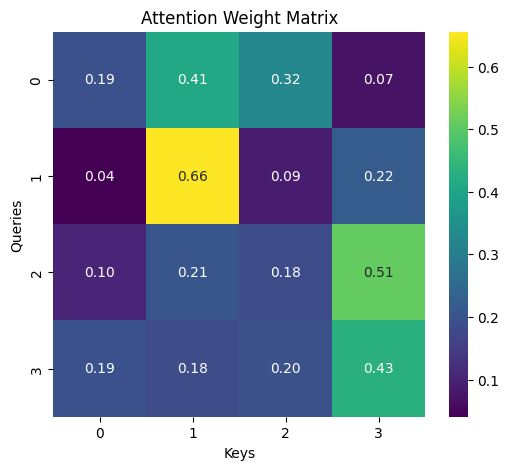

In [32]:
plt.figure(figsize=(6,5))
sns.heatmap(attn_weights.detach().numpy(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Attention Weight Matrix")
plt.xlabel("Keys")
plt.ylabel("Queries")
plt.show()
